In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#Read the dataset from file csv.
df=pd.read_csv('/kaggle/input/diabetese-dataset/Dataset of Diabetes .csv')

df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
#preprocess to understand why there is a duplication between classes Y and N
df["CLASS"].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [4]:
#method that removes the spcaes

df["CLASS"]=df["CLASS"].str.strip()

In [5]:
#exploring CLASS values

df['CLASS'].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [6]:
# check missing values in variables

df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [7]:
#split dataset in features and target variable
import category_encoders as ce


# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Gender']) #, 'CLASS'
df = encoder.fit_transform(df)

X = df.drop(['ID','No_Pation','CLASS'], axis=1) # Features 

y = df['CLASS'] # Target variable

In [8]:
#just to check of the encoding worked
print(df[['Gender', 'CLASS']].head())

   Gender CLASS
0       1     N
1       2     N
2       1     N
3       1     N
4       2     N


In [9]:
# Split dataset into training set and test set
''''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test
'''
#70-15-15 split ratios
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) 

print(f"\nData split sizes:\nTrain: {len(X_train)} | Validation: {len(X_val)} | Test: {len(X_test)}")


Data split sizes:
Train: 350 | Validation: 350 | Test: 300


In [10]:
X_train.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
913,1,31,4.8,52,6.5,5.5,2.1,1.0,3.6,0.9,33.0
861,1,44,3.6,59,9.1,5.4,2.4,1.1,3.2,1.1,23.0
320,2,60,6.5,30,9.0,5.9,3.4,0.8,3.7,0.5,30.0
352,2,53,3.0,48,9.5,7.2,2.0,1.9,2.0,0.7,32.0
488,1,63,4.2,72,9.3,4.4,2.1,1.1,2.5,0.9,26.0


In [11]:
X_val.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
375,1,68,5.7,71,7.0,5.0,1.7,0.8,3.5,0.8,36.6
556,2,61,0.5,59,7.5,4.5,1.8,1.0,2.7,0.8,38.0
610,1,55,4.0,56,13.7,4.4,2.0,1.0,2.5,0.9,37.0
634,1,53,3.3,48,12.8,5.1,3.0,0.9,2.9,1.3,37.0
157,2,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4


In [12]:
X_test.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
521,1,54,11.3,130,7.7,6.3,5.4,0.8,3.3,2.4,33.0
737,1,58,2.7,39,10.1,6.3,2.4,1.4,3.8,1.1,30.0
740,1,52,4.7,34,9.9,5.1,4.5,0.6,2.7,2.0,26.0
660,1,54,3.7,38,11.6,4.7,4.0,0.8,2.3,1.8,38.0
411,1,55,3.0,41,4.3,4.6,0.7,1.8,1.1,1.3,37.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier


clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5,
    min_samples_leaf=4,random_state=0)


# start excuting
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       min_samples_split=5, random_state=0)

In [15]:
y_val_pred = clf_en.predict(X_val)
y_test_pred = clf_en.predict(X_test)

In [16]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))

Model accuracy score with criterion entropy: 0.9800


In [17]:
y_pred_train_en = clf_en.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9914


In [18]:
# print the scores on training, validation, and test sets

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Validation set score: {:.4f}'.format(clf_en.score(X_val, y_val)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9914
Validation set score: 0.9571
Test set score: 0.9800


[Text(0.6666666666666666, 0.9, 'x[4] <= 6.45\nentropy = 0.78\nsamples = 350\nvalue = [33, 22, 295]'),
 Text(0.5555555555555556, 0.7, 'x[4] <= 5.65\nentropy = 1.557\nsamples = 77\nvalue = [33, 22, 22]'),
 Text(0.3333333333333333, 0.5, 'x[10] <= 24.75\nentropy = 0.859\nsamples = 46\nvalue = [33, 0, 13]'),
 Text(0.2222222222222222, 0.3, 'x[5] <= 5.0\nentropy = 0.414\nsamples = 36\nvalue = [33, 0, 3]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.985\nsamples = 7\nvalue = [4, 0, 3]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10]'),
 Text(0.7777777777777778, 0.5, 'x[1] <= 50.5\nentropy = 0.869\nsamples = 31\nvalue = [0, 22, 9]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples = 22\nvalue = [0, 22, 0]'),
 Text(0.8888888888888888, 0.3, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]'),
 Text(0.7777777777777778, 0.7, 'entropy = 0.0\nsamples = 273\nvalue = [0, 0, 273]')]

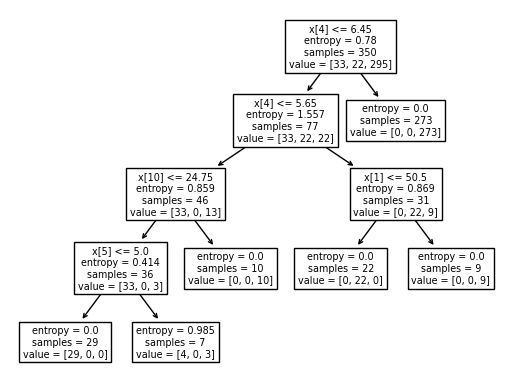

In [19]:
from sklearn import tree

# Visualizing the Decision Tree in text
tree.plot_tree(clf_en.fit(X_train, y_train)) 

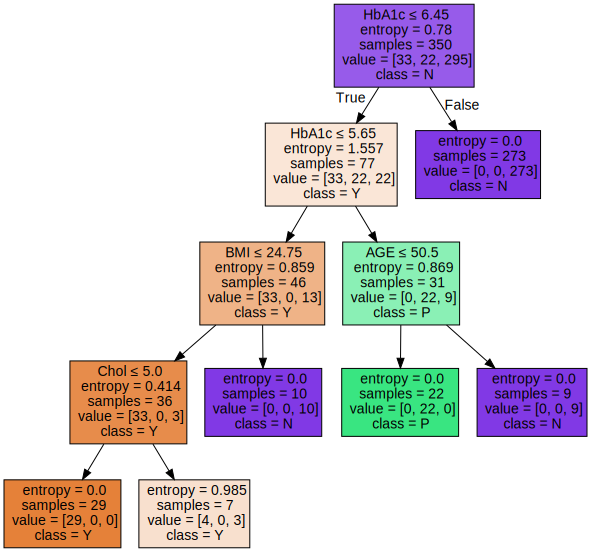

In [20]:
import graphviz 

# Visualizing the Decision Tree
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=[str(c) for c in y_train.unique()],  
                              filled=True, rounded=False,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

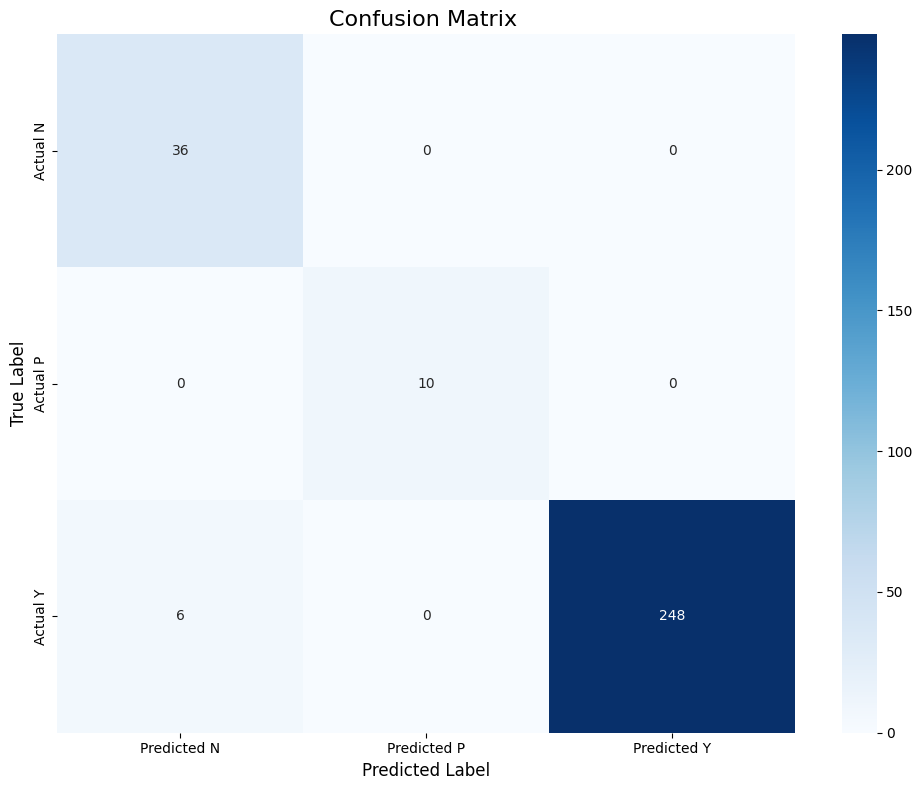

In [21]:
# Show results as a confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_test_pred)


class_labels = clf_en.classes_ 

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Predicted {label}' for label in class_labels],
            yticklabels=[f'Actual {label}' for label in class_labels])
plt.title('Confusion Matrix ', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

#print('Confusion matrix\n\n', cm)

In [22]:
#Print classification report

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Data):
              precision    recall  f1-score   support

           N       0.86      1.00      0.92        36
           P       1.00      1.00      1.00        10
           Y       1.00      0.98      0.99       254

    accuracy                           0.98       300
   macro avg       0.95      0.99      0.97       300
weighted avg       0.98      0.98      0.98       300

